# Initial Insights - Movies, Genres, and Gross Sales

Our goals in this stage of the project will be to develop initial insights about our data using the techniques discussed in class. Given our movie data, our aims are to gain insights on the following:

- 1) What kind of movie genres are popular in which year (insights about time trends)
- 2) What kind of correlation (if any) is there between movie genre and gross sales



We first did some pre-processing our Table E from stage 4. We split up genre and reformatted the data from wide to long. Below, we will continue working with the long format.

## Genre Trends by Year (Roll-Up)

In [85]:
#import modules
import csv
import pandas as pd
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

In [12]:
df = pd.read_csv("../DATA/movie_genre.csv", encoding='mac_roman')
df.shape

(61804, 6)

In [13]:
df.head(n=20)

,lid,rid,title,year,genres,gross
0,1.0,72998.0,Avatar,2009,sci-fi,760505847
1,1.0,72998.0,Avatar,2009,action,760505847
2,1.0,72998.0,Avatar,2009,fantasy,760505847
3,1.0,72998.0,Avatar,2009,imax,760505847
4,1.0,72998.0,Avatar,2009,adventure,760505847
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152
6,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,adventure,309404152
7,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,action,309404152
8,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,fantasy,309404152
9,3.0,127216.0,Unexpected,2015,drama,200074175


In [45]:
#what are the unique genre levels?
df.genres.unique()
df.year.unique()

array(['2009', '2007', '2015', '2012', '.', '2010', '2016', '2006', '2008',
       '2013', '2011', '2014', '2005', '1997', '2004', '1999', '1995',
       '2003', '2001', '2002', '1998', '2000', '1990', '1991', '1994',
       '1996', '1982', '1993', '1979', '1992', '1989', '1984', '1988',
       '1978', '1962', '1980', '1972', '1981', '1968', '1985', '1940',
       '1963', '1987', '1986', '1973', '1983', '1976', '1977', '1970',
       '1971', '1969', '1960', '1965', '1964', '1927', '1974', '1937',
       '1975', '1967', '1951', '1961', '1946', '1953', '1954', '1959',
       '1932', '1947', '1956', '1945', '1952', '1930', '1966', '1939',
       '1950', '1948', '1958', '1957', '1943', '1944', '1938', '1949',
       '1936', '1941', '1955', '1942', '1929', '1935', '1933', '1916',
       '1934', '1925', '1920', '1926', '1931', '1922', '1928', '1914',
       '1919', '1923', '1918', '1921', '1924', '1915', '1917', '948)',
       '965)', '988)', '999)', '003)', '002)', '995)', '1902', '001)',
 

In [189]:
#keep only where both year and genre exist
subdf = df.loc[df['rid'].notnull() & (df['genres']!= "(no genres listed)")]
subdf.head(n=20)


,lid,rid,title,year,genres,gross
0,1.0,72998.0,Avatar,2009,sci-fi,760505847
1,1.0,72998.0,Avatar,2009,action,760505847
2,1.0,72998.0,Avatar,2009,fantasy,760505847
3,1.0,72998.0,Avatar,2009,imax,760505847
4,1.0,72998.0,Avatar,2009,adventure,760505847
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152
6,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,adventure,309404152
7,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,action,309404152
8,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,fantasy,309404152
9,3.0,127216.0,Unexpected,2015,drama,200074175


In [56]:
#keep data only since 2000
#keep only where both year and genre exist
subdf = subdf.loc[(df['year']== "2000") | (df['year']== "2001") | (df['year']== "2002") | 
             (df['year']== "2003") | (df['year']== "2004") | (df['year']== "2005") | (df['year']== "2006") |
             (df['year']== "2007") | (df['year']== "2008") | (df['year']== "2009") | (df['year']== "2010") | 
             (df['year']== "2011") | (df['year']== "2012") | (df['year']== "2013") | (df['year']== "2014") | 
             (df['year']== "2015") | (df['year']== "2016")]
subdf.head(n=20)

,lid,rid,title,year,genres,gross
0,1.0,72998.0,Avatar,2009,sci-fi,760505847
1,1.0,72998.0,Avatar,2009,action,760505847
2,1.0,72998.0,Avatar,2009,fantasy,760505847
3,1.0,72998.0,Avatar,2009,imax,760505847
4,1.0,72998.0,Avatar,2009,adventure,760505847
5,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,comedy,309404152
6,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,adventure,309404152
7,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,action,309404152
8,2.0,53125.0,Pirates of the Caribbean: At World's End,2007,fantasy,309404152
9,3.0,127216.0,Unexpected,2015,drama,200074175


In [57]:
subdf.shape

(29368, 6)

In [58]:
subdf.dtypes

lid       float64
rid       float64
title      object
year       object
genres     object
gross      object
dtype: object

Let's first explore what is going on with all the genres:

In [108]:
sub = subdf[['title', 'genres','year']]

#df2  = subdf.groupby(['genres', 'year'])['genres'].count().unstack('year').fillna(0)
sub1 = sub.groupby(['genres','year'])['year'].count().unstack('genres')
#df2[['genres','year']].plot(kind='bar', stacked=True)
sub1

genres,action,adventure,animation,biography,children,comedy,crime,documentary,drama,family,...,musical,mystery,news,romance,sci-fi,short,sport,thriller,war,western
year,,,,,,,,,,,,,,,,,,,,,
2000,77.0,54.0,29.0,7.0,25.0,240.0,84.0,51.0,348.0,18.0,...,15.0,35.0,NaN,131.0,39.0,NaN,8.0,128.0,13.0,8.0
2001,107.0,51.0,28.0,8.0,22.0,241.0,87.0,54.0,364.0,15.0,...,20.0,55.0,NaN,133.0,38.0,NaN,9.0,126.0,30.0,5.0
2002,106.0,64.0,33.0,9.0,35.0,239.0,113.0,64.0,393.0,23.0,...,20.0,61.0,NaN,144.0,50.0,NaN,10.0,140.0,30.0,3.0
2003,112.0,67.0,30.0,10.0,40.0,254.0,104.0,77.0,352.0,19.0,...,26.0,52.0,NaN,122.0,41.0,NaN,3.0,140.0,25.0,7.0
2004,121.0,83.0,38.0,13.0,29.0,250.0,83.0,92.0,392.0,27.0,...,23.0,56.0,NaN,142.0,55.0,NaN,11.0,138.0,32.0,10.0
2005,124.0,90.0,25.0,11.0,35.0,254.0,101.0,95.0,430.0,29.0,...,24.0,61.0,NaN,150.0,40.0,NaN,17.0,162.0,28.0,7.0
2006,111.0,98.0,51.0,15.0,39.0,293.0,110.0,115.0,470.0,33.0,...,24.0,68.0,NaN,155.0,49.0,NaN,14.0,187.0,34.0,4.0
2007,112.0,70.0,46.0,17.0,31.0,284.0,126.0,127.0,486.0,19.0,...,34.0,58.0,NaN,169.0,47.0,2.0,9.0,189.0,47.0,9.0
2008,154.0,101.0,53.0,13.0,35.0,283.0,114.0,165.0,495.0,26.0,...,27.0,68.0,NaN,168.0,69.0,1.0,9.0,196.0,53.0,8.0


In [81]:
list(sub1.columns.values)

['action',
 'adventure',
 'animation',
 'biography',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'imax',
 'music',
 'musical',
 'mystery',
 'news',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'thriller',
 'war',
 'western']

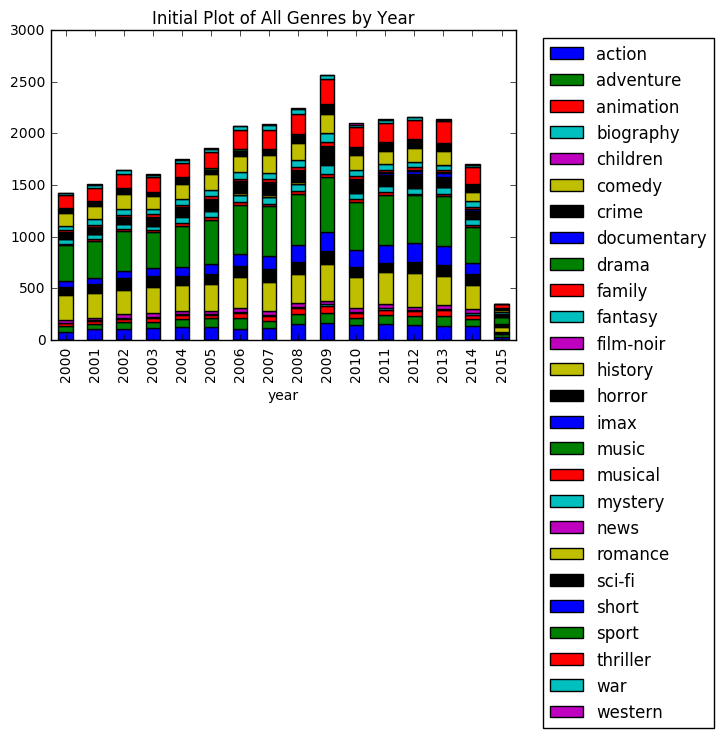

In [89]:
sub1.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Initial Plot of All Genres by Year")

*Initial Insights*: Firstly, there are too many genres for us to be able to discern anything, especially because colors are repeated. We do, however, identify that fewer movies were made in 2015. This is likely true since data may not have been updated prior to beginning our analysis. Also, we see that in 2009 there were many more genres types. We cannot be certain if this means there were more movies made in that year. That is then a good starting point - let's identify if there were any differences amongst years in how many movies were produced each year.

In [93]:
#Let's get a sense of how many movies we have per year

##drop duplicates
dftitle = subdf.drop_duplicates(subset=['title', 'year'], keep=False)
dftitle.head()

,lid,rid,title,year,genres,gross
1535,332.0,96110.0,"Campaign, The",2012,comedy,86897182
2032,441.0,86911.0,"Hangover Part II, The",2011,comedy,254455986
2072,450.0,104218.0,Grown Ups 2,2013,comedy,133668525
2456,536.0,79134.0,Grown Ups,2010,comedy,162001186
2759,608.0,80590.0,Wall Street: Money Never Sleeps,2010,drama,52474616


In [103]:
sub2 = dftitle.groupby(['year'])['year'].count()
sub2


year
2000    196
2001    195
2002    201
2003    200
2004    233
2005    222
2006    269
2007    290
2008    357
2009    397
2010    360
2011    407
2012    390
2013    389
2014    252
2015     29
Name: year, dtype: int64

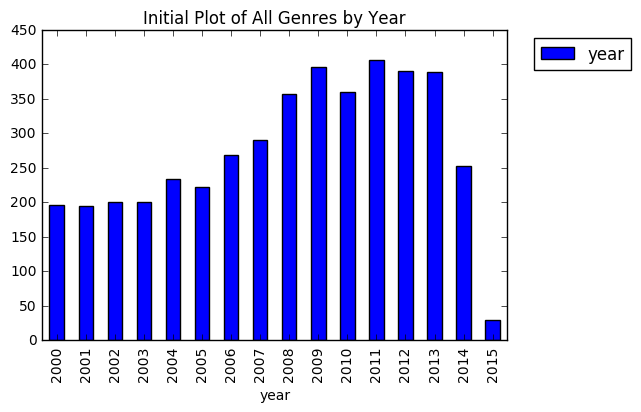

In [105]:
sub2.plot(kind='bar')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Initial Plot of Movie Counts by Year")

Based on this, we can see that 2015 appears to be an outlier. Also, we see that 2000 and 2001 have very close counts for movies. Additionally, we find an increase in the amount of movies produced (based on our data) from about 2007 through 2013, and a decrease following that. Since we do not know exactly how this data was collected, we cannot rule out survey/data collection issues. For this analysis, we will take this as given and continue with the analysis.

This also gives us insight into what was happening in 2009 in regards to genre. Although 2009 was a high movie-volume year, so was 2012. However in our first plat of genre, 2012 does not have as many genres. This leads us to think that in 2009 there were many more movies that had multiple genres attributed to them. Given that there are too many genres for us really understand, let's roll-up and break the groups into large categories.

### Roll-up on larger genre groups

In [125]:
def label_bigGenre(row):
    if row['genres'] == 'action':
        return 'action-adventure'
    if row['genres'] == 'adventure':
        return 'action-adventure'
    if row['genres'] == 'children':
        return 'family-children'
    if row['genres'] == 'crime':
        return 'drama'
    if row['genres'] == 'drama':
        return 'drama'
    if row['genres'] == 'family':
        return 'family-children'
    if row['genres'] == 'fantasy':
        return 'fantasy/scifi'
    if row['genres'] == 'film-noir':
        return 'drama'
    if row['genres'] == 'history':
        return 'drama'
    if row['genres'] == 'horror':
        return 'horror'
    if row['genres'] == 'romance':
        return 'romance-comedy'
    if row['genres'] == 'comedy':
        return 'romance-comedy'
    if row['genres'] == 'sci-fi':
        return 'fantasy/scifi'
    if row['genres'] == 'thriller':
        return 'horror'
    if row['genres'] == 'war':
        return 'drama'
    return 'Other'


In [131]:
subdf.head()

,lid,rid,title,year,genres,gross
0,1.0,72998.0,Avatar,2009,sci-fi,760505847
1,1.0,72998.0,Avatar,2009,action,760505847
2,1.0,72998.0,Avatar,2009,fantasy,760505847
3,1.0,72998.0,Avatar,2009,imax,760505847
4,1.0,72998.0,Avatar,2009,adventure,760505847


In [132]:
subdf['bigGenre'] = sub.apply(lambda row: label_bigGenre(row), axis=1)

In [133]:
subdf.bigGenre.unique() #much more reasonable. Let's try plotting again:

array(['fantasy/scifi', 'action-adventure', 'Other', 'romance-comedy',
       'drama', 'horror', 'family-children'], dtype=object)

In [134]:
sub3 = subdf.groupby(['bigGenre','year'])['year'].count().unstack('bigGenre')
sub3

bigGenre,Other,action-adventure,drama,family-children,fantasy/scifi,horror,romance-comedy
year,,,,,,,
2000,164,131,447,43,83,187,371
2001,190,158,486,37,85,179,374
2002,209,170,542,58,90,192,383
2003,217,179,489,59,81,205,376
2004,258,204,514,56,120,210,392
2005,257,214,571,64,96,251,404
2006,310,209,626,72,120,287,448
2007,322,182,674,50,113,297,453
2008,361,255,679,61,141,299,451


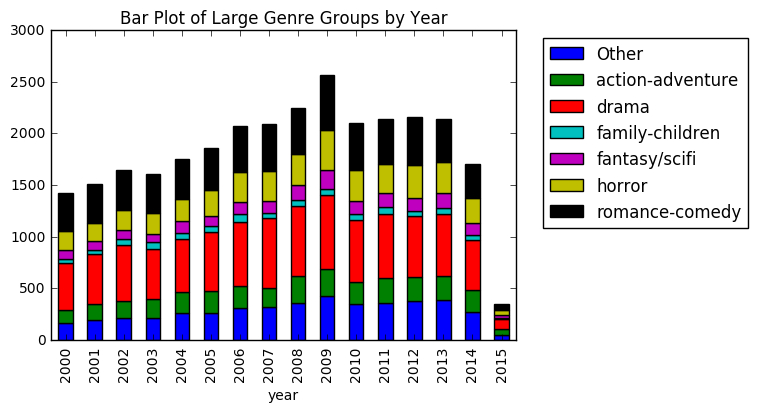

In [135]:
sub3.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Bar Plot of Large Genre Groups by Year")

We can understand more from the second plot above after roll-up into larger groups. First, we can see that the largest group across all years is drama, followed by romance-comedy, and then horror and other follow. Family-children genre makes up a very small fraction of movies in this dataset. It is also surprising that action-adventure is not a larger portion.

Next, we will look explore correlation between genre and gross sales

## Genre Trends by Gross Sales (Correlation Discovery)


In [191]:
subdf.head()
#subdf.bigGenre.unique()

,lid,rid,title,year,genres,gross
0,1.0,72998.0,Avatar,2009,sci-fi,760505847
1,1.0,72998.0,Avatar,2009,action,760505847
2,1.0,72998.0,Avatar,2009,fantasy,760505847
3,1.0,72998.0,Avatar,2009,imax,760505847
4,1.0,72998.0,Avatar,2009,adventure,760505847


In [ ]:
#drop where gross is missing or na

## Insights


Our initial insights on this dataset:

- data for 2015 appears to incomplete (anomaly year)
- more information is needed on how data was collected. Early 2000's data show much fewer movies being made. Is this an artificat of the selection criteria in creating the dataset or is that accurate?
- boost in movies coming out between 2008 - 2013
- largest group by genre is drama, followed by romance-comedy; action-adventure is a smaller portion than expected